In [3]:
import os
# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
glcm_df = pd.read_csv("glcm_coffee_dataset.csv")

In [6]:
glcm_df.head()

,Unnamed: 0,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,0,3.225539,3.679097,3.835298,4.077126,0.985857,0.981498,0.980730,0.978722,0.427142,...,64.822246,0.005439,0.004972,0.004990,0.004823,0.073748,0.070511,0.070639,0.069450,LGC
1,1,2.774717,3.243531,3.205410,3.458236,0.978049,0.971573,0.971662,0.967321,0.473154,...,51.167628,0.007451,0.006865,0.006930,0.006684,0.086321,0.082858,0.083248,0.081755,LGC
2,2,2.753947,3.221718,3.181865,3.432108,0.978409,0.971973,0.972079,0.967804,0.476367,...,50.230946,0.007596,0.007003,0.007083,0.006842,0.087156,0.083684,0.084161,0.082714,LGC
3,3,2.814796,3.282403,3.237196,3.496530,0.977401,0.970837,0.970965,0.966481,0.468644,...,52.441974,0.007361,0.006799,0.006902,0.006642,0.085799,0.082455,0.083080,0.081499,LGC
4,4,2.797355,3.486976,3.340112,3.342869,0.979160,0.967085,0.969370,0.971399,0.471095,...,46.853719,0.007071,0.006433,0.006643,0.006447,0.084089,0.080204,0.081505,0.080293,LGC


In [7]:
glcm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         241 non-null    int64  
 1   dissimilarity_0    241 non-null    float64
 2   dissimilarity_45   241 non-null    float64
 3   dissimilarity_90   241 non-null    float64
 4   dissimilarity_135  241 non-null    float64
 5   correlation_0      241 non-null    float64
 6   correlation_45     241 non-null    float64
 7   correlation_90     241 non-null    float64
 8   correlation_135    241 non-null    float64
 9   homogeneity_0      241 non-null    float64
 10  homogeneity_45     241 non-null    float64
 11  homogeneity_90     241 non-null    float64
 12  homogeneity_135    241 non-null    float64
 13  contrast_0         241 non-null    float64
 14  contrast_45        241 non-null    float64
 15  contrast_90        241 non-null    float64
 16  contrast_135       241 non

In [8]:
label_distr = glcm_df['label'].value_counts()

In [11]:
print(label_distr.index)

Index(['MLB', 'XVL', 'LBTP', 'XFR', 'XCD', 'XFF', 'LYT', 'LGC', 'MB', 'LEY',
       'DFC2C', 'DCR', 'DFC', 'MFCS', 'MFCD', 'DC+'],
      dtype='object')


In [8]:
label_name = ['MLB','MB','XFF','DFC2C','LGC', 'DCR', 'MFCS', 'DFC', 'LBTP', 'DC+', 'MFCD', 'LYT', 'XFR', 'XCD', 'XVL', 'LEY']

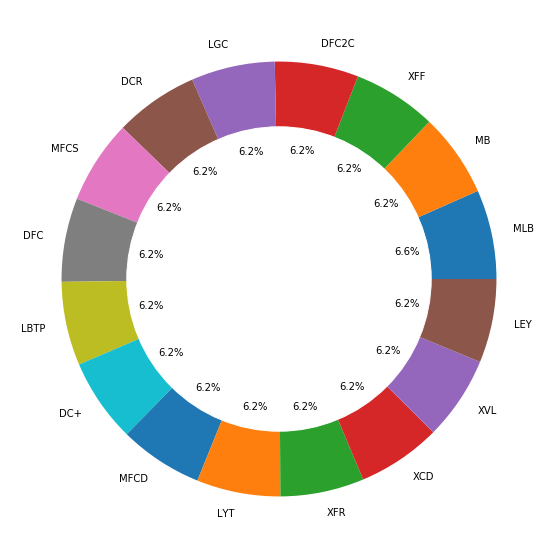

In [9]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Prepdare Dataset

In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


#### Normalization decimal scaling

In [42]:
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)


In [43]:
X = decimal_scaling(
            glcm_df[['dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135', 
                     'correlation_0', 'correlation_45', 'correlation_90', 'correlation_135', 
                     'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135', 
                     'contrast_0', 'contrast_45', 'contrast_90', 'contrast_135', 
                     'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135',
                     'energy_0', 'energy_45', 'energy_90', 'energy_135']].values
                )

#### Label encoding & categoricalize output vector

In [44]:
le = LabelEncoder()
le.fit(glcm_df["label"].values)
le.classes_

array(['DC+', 'DCR', 'DFC', 'DFC2C', 'LBTP', 'LEY', 'LGC', 'LYT', 'MB',
       'MFCD', 'MFCS', 'MLB', 'XCD', 'XFF', 'XFR', 'XVL'], dtype=object)

In [45]:
print(le.classes_)

['DC+' 'DCR' 'DFC' 'DFC2C' 'LBTP' 'LEY' 'LGC' 'LYT' 'MB' 'MFCD' 'MFCS'
 'MLB' 'XCD' 'XFF' 'XFR' 'XVL']


In [46]:
Y = le.transform(glcm_df['label'].values)
Y = to_categorical(Y)

#### Split dataset

In [49]:
X_train, X_test, y_train, y_test = \
                    train_test_split(X, 
                                     Y, 
                                     test_size=0.25, 
                                     random_state=42)
  
print("Dimensi data :\n")
print("X train \t X test \t Y train \t Y test")  
print("%s \t %s \t %s \t %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Dimensi data :

X train 	 X test 	 Y train 	 Y test
(180, 24) 	 (61, 24) 	 (180, 16) 	 (61, 16)


### Build Neural Network Model

In [50]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation

import keras
from keras import backend as K

In [51]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [52]:
def nn_model(max_len):
    
    model = Sequential()
    model.add(Dense(32, 
                    activation="elu",
                    input_shape=(max_len,)))
    model.add(Dense(1024, activation="elu"))
    model.add(Dense(512, activation="elu"))
    model.add(Dense(256, activation="elu"))
    model.add(Dense(128, activation="elu"))
    model.add(Dense(16))
    model.add(Activation("sigmoid"))
    
    model.summary() 
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy', precision, recall])

    return model

In [53]:
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_):

    hist = model_.fit(x, 
                      y,
                      epochs=epochs_,
                      batch_size=batch_size_,
                      validation_data=(x_val,y_val))
    return hist 

In [54]:
max_len = X_train.shape[1]  

EPOCHS = 1000
BATCH_SIZE = 32

model = nn_model(max_len)
history=check_model(model, X_train,y_train,X_test,y_test, EPOCHS, BATCH_SIZE)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                800       
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              33792     
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 16)                2064      
_________________________________________________________________
activation_4 (Activation)    (None, 16)               

180/180 [==============================] - 0s 750us/step - loss: 1.6385 - accuracy: 0.2556 - precision: 0.9708 - recall: 0.1803 - val_loss: 1.7279 - val_accuracy: 0.2295 - val_precision: 0.9499 - val_recall: 0.1671
Epoch 32/1000
180/180 [==============================] - 0s 856us/step - loss: 1.6395 - accuracy: 0.2222 - precision: 0.9656 - recall: 0.1771 - val_loss: 1.7222 - val_accuracy: 0.2131 - val_precision: 0.9343 - val_recall: 0.1648
Epoch 33/1000
180/180 [==============================] - 0s 783us/step - loss: 1.6123 - accuracy: 0.2222 - precision: 0.9656 - recall: 0.1841 - val_loss: 1.6496 - val_accuracy: 0.2295 - val_precision: 0.9828 - val_recall: 0.1759
Epoch 34/1000
180/180 [==============================] - 0s 750us/step - loss: 1.5920 - accuracy: 0.2333 - precision: 0.9792 - recall: 0.1862 - val_loss: 1.6485 - val_accuracy: 0.2623 - val_precision: 0.9828 - val_recall: 0.1744
Epoch 35/1000
180/180 [==============================] - 0s 711us/step - loss: 1.6177 - accuracy: 

Epoch 67/1000
180/180 [==============================] - 0s 1ms/step - loss: 1.7086 - accuracy: 0.2500 - precision: 1.0000 - recall: 0.1720 - val_loss: 1.7195 - val_accuracy: 0.1967 - val_precision: 0.9671 - val_recall: 0.1668
Epoch 68/1000
180/180 [==============================] - 0s 1ms/step - loss: 1.6971 - accuracy: 0.2500 - precision: 0.9896 - recall: 0.1733 - val_loss: 1.6708 - val_accuracy: 0.1803 - val_precision: 1.0000 - val_recall: 0.1720
Epoch 69/1000
180/180 [==============================] - 0s 1ms/step - loss: 1.6371 - accuracy: 0.2056 - precision: 0.9896 - recall: 0.1794 - val_loss: 1.6222 - val_accuracy: 0.1803 - val_precision: 1.0000 - val_recall: 0.1780
Epoch 70/1000
180/180 [==============================] - 0s 956us/step - loss: 1.6127 - accuracy: 0.2444 - precision: 1.0000 - recall: 0.1847 - val_loss: 1.6507 - val_accuracy: 0.2295 - val_precision: 1.0000 - val_recall: 0.1790
Epoch 71/1000
180/180 [==============================] - 0s 1ms/step - loss: 1.6235 - accu

180/180 [==============================] - 0s 1ms/step - loss: 1.6397 - accuracy: 0.1889 - precision: 1.0000 - recall: 0.1773 - val_loss: 1.6980 - val_accuracy: 0.2295 - val_precision: 1.0000 - val_recall: 0.1686
Epoch 103/1000
180/180 [==============================] - 0s 844us/step - loss: 1.6369 - accuracy: 0.1667 - precision: 0.9917 - recall: 0.1785 - val_loss: 1.6859 - val_accuracy: 0.2459 - val_precision: 0.9828 - val_recall: 0.1684
Epoch 104/1000
180/180 [==============================] - 0s 811us/step - loss: 1.6144 - accuracy: 0.1833 - precision: 0.9948 - recall: 0.1799 - val_loss: 1.6870 - val_accuracy: 0.2295 - val_precision: 1.0000 - val_recall: 0.1700
Epoch 105/1000
180/180 [==============================] - 0s 1ms/step - loss: 1.6069 - accuracy: 0.1833 - precision: 1.0000 - recall: 0.1818 - val_loss: 1.6748 - val_accuracy: 0.2295 - val_precision: 0.9828 - val_recall: 0.1689
Epoch 106/1000
180/180 [==============================] - 0s 750us/step - loss: 1.6058 - accuracy: 

Epoch 138/1000
180/180 [==============================] - 0s 828us/step - loss: 1.6042 - accuracy: 0.2167 - precision: 1.0000 - recall: 0.1811 - val_loss: 1.6566 - val_accuracy: 0.2131 - val_precision: 1.0000 - val_recall: 0.1744
Epoch 139/1000
180/180 [==============================] - 0s 950us/step - loss: 1.5965 - accuracy: 0.2222 - precision: 0.9948 - recall: 0.1868 - val_loss: 1.6531 - val_accuracy: 0.2295 - val_precision: 1.0000 - val_recall: 0.1738
Epoch 140/1000
180/180 [==============================] - 0s 733us/step - loss: 1.5955 - accuracy: 0.2333 - precision: 0.9917 - recall: 0.1823 - val_loss: 1.6634 - val_accuracy: 0.2295 - val_precision: 1.0000 - val_recall: 0.1709
Epoch 141/1000
180/180 [==============================] - 0s 739us/step - loss: 1.6168 - accuracy: 0.2444 - precision: 0.9740 - recall: 0.1782 - val_loss: 1.6952 - val_accuracy: 0.1967 - val_precision: 1.0000 - val_recall: 0.1685
Epoch 142/1000
180/180 [==============================] - 0s 750us/step - loss: 

Epoch 174/1000
180/180 [==============================] - 0s 722us/step - loss: 1.5953 - accuracy: 0.2056 - precision: 1.0000 - recall: 0.1808 - val_loss: 1.6510 - val_accuracy: 0.2295 - val_precision: 1.0000 - val_recall: 0.1724
Epoch 175/1000
180/180 [==============================] - 0s 861us/step - loss: 1.5899 - accuracy: 0.1944 - precision: 0.9948 - recall: 0.1844 - val_loss: 1.6391 - val_accuracy: 0.2459 - val_precision: 0.9655 - val_recall: 0.1683
Epoch 176/1000
180/180 [==============================] - 0s 739us/step - loss: 1.5769 - accuracy: 0.1889 - precision: 0.9656 - recall: 0.1808 - val_loss: 1.6637 - val_accuracy: 0.2295 - val_precision: 0.9655 - val_recall: 0.1679
Epoch 177/1000
180/180 [==============================] - 0s 717us/step - loss: 1.5925 - accuracy: 0.1944 - precision: 0.9844 - recall: 0.1822 - val_loss: 1.6303 - val_accuracy: 0.2623 - val_precision: 1.0000 - val_recall: 0.1754
Epoch 178/1000
180/180 [==============================] - 0s 722us/step - loss: 

Epoch 210/1000
180/180 [==============================] - 0s 761us/step - loss: 1.5300 - accuracy: 0.2389 - precision: 0.9635 - recall: 0.1859 - val_loss: 1.6514 - val_accuracy: 0.2623 - val_precision: 0.9327 - val_recall: 0.1752
Epoch 211/1000
180/180 [==============================] - 0s 739us/step - loss: 1.5437 - accuracy: 0.2167 - precision: 0.9552 - recall: 0.1867 - val_loss: 1.5854 - val_accuracy: 0.2787 - val_precision: 1.0000 - val_recall: 0.1790
Epoch 212/1000
180/180 [==============================] - 0s 722us/step - loss: 1.5084 - accuracy: 0.2667 - precision: 0.9948 - recall: 0.1895 - val_loss: 1.5973 - val_accuracy: 0.2787 - val_precision: 0.9828 - val_recall: 0.1779
Epoch 213/1000
180/180 [==============================] - 0s 761us/step - loss: 1.5063 - accuracy: 0.2444 - precision: 0.9812 - recall: 0.1920 - val_loss: 1.5745 - val_accuracy: 0.2787 - val_precision: 0.9655 - val_recall: 0.1770
Epoch 214/1000
180/180 [==============================] - 0s 717us/step - loss: 

Epoch 246/1000
180/180 [==============================] - 0s 667us/step - loss: 1.5716 - accuracy: 0.2167 - precision: 0.9677 - recall: 0.1796 - val_loss: 1.6292 - val_accuracy: 0.2787 - val_precision: 0.9828 - val_recall: 0.1713
Epoch 247/1000
180/180 [==============================] - 0s 678us/step - loss: 1.5709 - accuracy: 0.2944 - precision: 1.0000 - recall: 0.1822 - val_loss: 1.6251 - val_accuracy: 0.2951 - val_precision: 1.0000 - val_recall: 0.1734
Epoch 248/1000
180/180 [==============================] - 0s 861us/step - loss: 1.5503 - accuracy: 0.2778 - precision: 0.9948 - recall: 0.1857 - val_loss: 1.6353 - val_accuracy: 0.2787 - val_precision: 0.9655 - val_recall: 0.1713
Epoch 249/1000
180/180 [==============================] - 0s 700us/step - loss: 1.5428 - accuracy: 0.2389 - precision: 0.9740 - recall: 0.1827 - val_loss: 1.5819 - val_accuracy: 0.2787 - val_precision: 1.0000 - val_recall: 0.1789
Epoch 250/1000
180/180 [==============================] - 0s 667us/step - loss: 

Epoch 282/1000
180/180 [==============================] - 0s 700us/step - loss: 1.4595 - accuracy: 0.2500 - precision: 0.9948 - recall: 0.2005 - val_loss: 1.5348 - val_accuracy: 0.2787 - val_precision: 1.0000 - val_recall: 0.1860
Epoch 283/1000
180/180 [==============================] - 0s 656us/step - loss: 1.4561 - accuracy: 0.2556 - precision: 0.9917 - recall: 0.1977 - val_loss: 1.5108 - val_accuracy: 0.2787 - val_precision: 0.9844 - val_recall: 0.1905
Epoch 284/1000
180/180 [==============================] - 0s 667us/step - loss: 1.4683 - accuracy: 0.2389 - precision: 0.9844 - recall: 0.2070 - val_loss: 1.5224 - val_accuracy: 0.2787 - val_precision: 1.0000 - val_recall: 0.1889
Epoch 285/1000
180/180 [==============================] - 0s 650us/step - loss: 1.4678 - accuracy: 0.2611 - precision: 0.9844 - recall: 0.1934 - val_loss: 1.5314 - val_accuracy: 0.2787 - val_precision: 1.0000 - val_recall: 0.1860
Epoch 286/1000
180/180 [==============================] - 0s 733us/step - loss: 

Epoch 318/1000
180/180 [==============================] - 0s 728us/step - loss: 1.4590 - accuracy: 0.2611 - precision: 0.9896 - recall: 0.1941 - val_loss: 1.5314 - val_accuracy: 0.2787 - val_precision: 0.9828 - val_recall: 0.1818
Epoch 319/1000
180/180 [==============================] - 0s 656us/step - loss: 1.4940 - accuracy: 0.2611 - precision: 0.9594 - recall: 0.2010 - val_loss: 1.5748 - val_accuracy: 0.2787 - val_precision: 0.9499 - val_recall: 0.1716
Epoch 320/1000
180/180 [==============================] - 0s 694us/step - loss: 1.7374 - accuracy: 0.2222 - precision: 0.9448 - recall: 0.1761 - val_loss: 1.6429 - val_accuracy: 0.3115 - val_precision: 0.9655 - val_recall: 0.1688
Epoch 321/1000
180/180 [==============================] - 0s 667us/step - loss: 1.5271 - accuracy: 0.2944 - precision: 1.0000 - recall: 0.1825 - val_loss: 1.7433 - val_accuracy: 0.2623 - val_precision: 0.9499 - val_recall: 0.1685
Epoch 322/1000
180/180 [==============================] - 0s 767us/step - loss: 

Epoch 354/1000
180/180 [==============================] - 0s 706us/step - loss: 1.2015 - accuracy: 0.3722 - precision: 0.9708 - recall: 0.2347 - val_loss: 1.2825 - val_accuracy: 0.3934 - val_precision: 0.9499 - val_recall: 0.2199
Epoch 355/1000
180/180 [==============================] - 0s 689us/step - loss: 1.1584 - accuracy: 0.4333 - precision: 0.9427 - recall: 0.2369 - val_loss: 1.3020 - val_accuracy: 0.3934 - val_precision: 0.8982 - val_recall: 0.2185
Epoch 356/1000
180/180 [==============================] - 0s 678us/step - loss: 1.1639 - accuracy: 0.4167 - precision: 0.8917 - recall: 0.2353 - val_loss: 1.2957 - val_accuracy: 0.4754 - val_precision: 0.8669 - val_recall: 0.2127
Epoch 357/1000
180/180 [==============================] - 0s 722us/step - loss: 1.2534 - accuracy: 0.3944 - precision: 0.8802 - recall: 0.2254 - val_loss: 1.2941 - val_accuracy: 0.3279 - val_precision: 0.8513 - val_recall: 0.1883
Epoch 358/1000
180/180 [==============================] - 0s 733us/step - loss: 

180/180 [==============================] - 0s 667us/step - loss: 1.0715 - accuracy: 0.4222 - precision: 0.9219 - recall: 0.2855 - val_loss: 1.1179 - val_accuracy: 0.3607 - val_precision: 1.0000 - val_recall: 0.2648
Epoch 390/1000
180/180 [==============================] - 0s 678us/step - loss: 1.1063 - accuracy: 0.4000 - precision: 0.9448 - recall: 0.2844 - val_loss: 1.1692 - val_accuracy: 0.2951 - val_precision: 0.9828 - val_recall: 0.2559
Epoch 391/1000
180/180 [==============================] - 0s 939us/step - loss: 1.1598 - accuracy: 0.4500 - precision: 0.9740 - recall: 0.2615 - val_loss: 1.1454 - val_accuracy: 0.4426 - val_precision: 1.0000 - val_recall: 0.2586
Epoch 392/1000
180/180 [==============================] - 0s 678us/step - loss: 1.1928 - accuracy: 0.3278 - precision: 0.8833 - recall: 0.2628 - val_loss: 1.3615 - val_accuracy: 0.3279 - val_precision: 0.9327 - val_recall: 0.2444
Epoch 393/1000
180/180 [==============================] - 0s 661us/step - loss: 1.4130 - accura

180/180 [==============================] - 0s 994us/step - loss: 1.1094 - accuracy: 0.4000 - precision: 0.8875 - recall: 0.3212 - val_loss: 1.0306 - val_accuracy: 0.3770 - val_precision: 0.9655 - val_recall: 0.3251
Epoch 425/1000
180/180 [==============================] - 0s 778us/step - loss: 1.1910 - accuracy: 0.4167 - precision: 0.9083 - recall: 0.2918 - val_loss: 3.6966 - val_accuracy: 0.2295 - val_precision: 0.6072 - val_recall: 0.2174
Epoch 426/1000
180/180 [==============================] - 0s 661us/step - loss: 1.4712 - accuracy: 0.3444 - precision: 0.8771 - recall: 0.2780 - val_loss: 1.3139 - val_accuracy: 0.3770 - val_precision: 0.9499 - val_recall: 0.2405
Epoch 427/1000
180/180 [==============================] - 0s 989us/step - loss: 1.3819 - accuracy: 0.3611 - precision: 0.8958 - recall: 0.2406 - val_loss: 1.2692 - val_accuracy: 0.4426 - val_precision: 0.9515 - val_recall: 0.2396
Epoch 428/1000
180/180 [==============================] - 0s 694us/step - loss: 1.2919 - accura

Epoch 460/1000
180/180 [==============================] - 0s 767us/step - loss: 0.7446 - accuracy: 0.5722 - precision: 0.8562 - recall: 0.3966 - val_loss: 0.9262 - val_accuracy: 0.6066 - val_precision: 0.7823 - val_recall: 0.4020
Epoch 461/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.5722 - precision: 0.8167 - recall: 0.4180 - val_loss: 0.8057 - val_accuracy: 0.5902 - val_precision: 0.8529 - val_recall: 0.4238
Epoch 462/1000
180/180 [==============================] - 0s 956us/step - loss: 0.6714 - accuracy: 0.5833 - precision: 0.7948 - recall: 0.4229 - val_loss: 0.8025 - val_accuracy: 0.5574 - val_precision: 0.7996 - val_recall: 0.3926
Epoch 463/1000
180/180 [==============================] - 0s 656us/step - loss: 0.6389 - accuracy: 0.5944 - precision: 0.8656 - recall: 0.4340 - val_loss: 0.6883 - val_accuracy: 0.6230 - val_precision: 0.8669 - val_recall: 0.4105
Epoch 464/1000
180/180 [==============================] - 0s 683us/step - loss: 0.

Epoch 496/1000
180/180 [==============================] - 0s 689us/step - loss: 0.6413 - accuracy: 0.7167 - precision: 0.6438 - recall: 0.4373 - val_loss: 0.5497 - val_accuracy: 0.7541 - val_precision: 0.7996 - val_recall: 0.4681
Epoch 497/1000
180/180 [==============================] - 0s 683us/step - loss: 0.5476 - accuracy: 0.7056 - precision: 0.6865 - recall: 0.4128 - val_loss: 0.5560 - val_accuracy: 0.7377 - val_precision: 0.7667 - val_recall: 0.4539
Epoch 498/1000
180/180 [==============================] - 0s 689us/step - loss: 0.5237 - accuracy: 0.7278 - precision: 0.6583 - recall: 0.4079 - val_loss: 0.5285 - val_accuracy: 0.7213 - val_precision: 0.6196 - val_recall: 0.4208
Epoch 499/1000
180/180 [==============================] - 0s 683us/step - loss: 0.4923 - accuracy: 0.7389 - precision: 0.6958 - recall: 0.4511 - val_loss: 0.5134 - val_accuracy: 0.7869 - val_precision: 0.7010 - val_recall: 0.4523
Epoch 500/1000
180/180 [==============================] - 0s 717us/step - loss: 

Epoch 532/1000
180/180 [==============================] - 0s 689us/step - loss: 0.3992 - accuracy: 0.7889 - precision: 0.5385 - recall: 0.4310 - val_loss: 0.4528 - val_accuracy: 0.8197 - val_precision: 0.4914 - val_recall: 0.4006
Epoch 533/1000
180/180 [==============================] - 0s 678us/step - loss: 0.3741 - accuracy: 0.8889 - precision: 0.5375 - recall: 0.4363 - val_loss: 0.3738 - val_accuracy: 0.8689 - val_precision: 0.4585 - val_recall: 0.4151
Epoch 534/1000
180/180 [==============================] - 0s 672us/step - loss: 0.3570 - accuracy: 0.8556 - precision: 0.4740 - recall: 0.4337 - val_loss: 0.3694 - val_accuracy: 0.7377 - val_precision: 0.3928 - val_recall: 0.3782
Epoch 535/1000
180/180 [==============================] - 0s 728us/step - loss: 0.3532 - accuracy: 0.8833 - precision: 0.4469 - recall: 0.4230 - val_loss: 0.3567 - val_accuracy: 0.9016 - val_precision: 0.3928 - val_recall: 0.3782
Epoch 536/1000
180/180 [==============================] - 0s 711us/step - loss: 

Epoch 568/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8278 - precision: 0.4938 - recall: 0.4004 - val_loss: 0.3571 - val_accuracy: 0.8197 - val_precision: 0.3944 - val_recall: 0.3686
Epoch 569/1000
180/180 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8500 - precision: 0.4500 - recall: 0.406 - 0s 1000us/step - loss: 0.3748 - accuracy: 0.8444 - precision: 0.4917 - recall: 0.4037 - val_loss: 0.4028 - val_accuracy: 0.8525 - val_precision: 0.4256 - val_recall: 0.3556
Epoch 570/1000
180/180 [==============================] - 0s 756us/step - loss: 0.4116 - accuracy: 0.8000 - precision: 0.4979 - recall: 0.3719 - val_loss: 0.4140 - val_accuracy: 0.8361 - val_precision: 0.4585 - val_recall: 0.3542
Epoch 571/1000
180/180 [==============================] - 0s 739us/step - loss: 0.4080 - accuracy: 0.7944 - precision: 0.5052 - recall: 0.3723 - val_loss: 0.3987 - val_accuracy: 0.8197 - val_precision: 0.4100 - val_recall: 0.3690
E

180/180 [==============================] - 0s 739us/step - loss: 0.3396 - accuracy: 0.8556 - precision: 0.4458 - recall: 0.3999 - val_loss: 0.3493 - val_accuracy: 0.8361 - val_precision: 0.3755 - val_recall: 0.3590
Epoch 604/1000
180/180 [==============================] - 0s 689us/step - loss: 0.3395 - accuracy: 0.8556 - precision: 0.4302 - recall: 0.3974 - val_loss: 0.3490 - val_accuracy: 0.8361 - val_precision: 0.3755 - val_recall: 0.3590
Epoch 605/1000
180/180 [==============================] - 0s 667us/step - loss: 0.3395 - accuracy: 0.8556 - precision: 0.4313 - recall: 0.4122 - val_loss: 0.3486 - val_accuracy: 0.8361 - val_precision: 0.3755 - val_recall: 0.3590
Epoch 606/1000
180/180 [==============================] - 0s 672us/step - loss: 0.3395 - accuracy: 0.8556 - precision: 0.4250 - recall: 0.3906 - val_loss: 0.3484 - val_accuracy: 0.8361 - val_precision: 0.3755 - val_recall: 0.3590
Epoch 607/1000
180/180 [==============================] - 0s 744us/step - loss: 0.3395 - accura

Epoch 639/1000
180/180 [==============================] - 0s 656us/step - loss: 0.5971 - accuracy: 0.8000 - precision: 0.5656 - recall: 0.4546 - val_loss: 0.6019 - val_accuracy: 0.7541 - val_precision: 0.6994 - val_recall: 0.4750
Epoch 640/1000
180/180 [==============================] - 0s 678us/step - loss: 0.6956 - accuracy: 0.7667 - precision: 0.6062 - recall: 0.4700 - val_loss: 1.0186 - val_accuracy: 0.7049 - val_precision: 0.6196 - val_recall: 0.4669
Epoch 641/1000
180/180 [==============================] - 0s 678us/step - loss: 0.8461 - accuracy: 0.7389 - precision: 0.6354 - recall: 0.4998 - val_loss: 0.5306 - val_accuracy: 0.8361 - val_precision: 0.7355 - val_recall: 0.4946
Epoch 642/1000
180/180 [==============================] - 0s 683us/step - loss: 0.5195 - accuracy: 0.7778 - precision: 0.7167 - recall: 0.4942 - val_loss: 0.5648 - val_accuracy: 0.8525 - val_precision: 0.7996 - val_recall: 0.5106
Epoch 643/1000
180/180 [==============================] - 0s 656us/step - loss: 

Epoch 675/1000
180/180 [==============================] - 0s 739us/step - loss: 0.3222 - accuracy: 0.8611 - precision: 0.5260 - recall: 0.4587 - val_loss: 0.3304 - val_accuracy: 0.8689 - val_precision: 0.4585 - val_recall: 0.4196
Epoch 676/1000
180/180 [==============================] - 0s 689us/step - loss: 0.3229 - accuracy: 0.8611 - precision: 0.5260 - recall: 0.4809 - val_loss: 0.3322 - val_accuracy: 0.8689 - val_precision: 0.4585 - val_recall: 0.4196
Epoch 677/1000
180/180 [==============================] - 0s 717us/step - loss: 0.3219 - accuracy: 0.8611 - precision: 0.5302 - recall: 0.4685 - val_loss: 0.3254 - val_accuracy: 0.8689 - val_precision: 0.4585 - val_recall: 0.4295
Epoch 678/1000
180/180 [==============================] - 0s 694us/step - loss: 0.3202 - accuracy: 0.8611 - precision: 0.5052 - recall: 0.4859 - val_loss: 0.3259 - val_accuracy: 0.8525 - val_precision: 0.4429 - val_recall: 0.4213
Epoch 679/1000
180/180 [==============================] - 0s 689us/step - loss: 

Epoch 711/1000
180/180 [==============================] - 0s 706us/step - loss: 0.4465 - accuracy: 0.7333 - precision: 0.6448 - recall: 0.4041 - val_loss: 0.4804 - val_accuracy: 0.7705 - val_precision: 0.6557 - val_recall: 0.4154
Epoch 712/1000
180/180 [==============================] - 0s 661us/step - loss: 0.4455 - accuracy: 0.7333 - precision: 0.6156 - recall: 0.3927 - val_loss: 0.4770 - val_accuracy: 0.7705 - val_precision: 0.6212 - val_recall: 0.4018
Epoch 713/1000
180/180 [==============================] - 0s 722us/step - loss: 0.4430 - accuracy: 0.7333 - precision: 0.5813 - recall: 0.3826 - val_loss: 0.4595 - val_accuracy: 0.7705 - val_precision: 0.6024 - val_recall: 0.3923
Epoch 714/1000
180/180 [==============================] - 0s 678us/step - loss: 0.4425 - accuracy: 0.7333 - precision: 0.5833 - recall: 0.3879 - val_loss: 0.4505 - val_accuracy: 0.7705 - val_precision: 0.6196 - val_recall: 0.4037
Epoch 715/1000
180/180 [==============================] - 0s 689us/step - loss: 

Epoch 747/1000
180/180 [==============================] - 0s 672us/step - loss: 0.3377 - accuracy: 0.8333 - precision: 0.5031 - recall: 0.4269 - val_loss: 0.3290 - val_accuracy: 0.8525 - val_precision: 0.4380 - val_recall: 0.4024
Epoch 748/1000
180/180 [==============================] - 0s 672us/step - loss: 0.3330 - accuracy: 0.8278 - precision: 0.5042 - recall: 0.4374 - val_loss: 0.3317 - val_accuracy: 0.8361 - val_precision: 0.4397 - val_recall: 0.4151
Epoch 749/1000
180/180 [==============================] - 0s 661us/step - loss: 0.3341 - accuracy: 0.8167 - precision: 0.4885 - recall: 0.4310 - val_loss: 0.3310 - val_accuracy: 0.8525 - val_precision: 0.4224 - val_recall: 0.3951
Epoch 750/1000
180/180 [==============================] - 0s 667us/step - loss: 0.3334 - accuracy: 0.8333 - precision: 0.4823 - recall: 0.4320 - val_loss: 0.3295 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.3951
Epoch 751/1000
180/180 [==============================] - 0s 678us/step - loss: 

Epoch 783/1000
180/180 [==============================] - 0s 650us/step - loss: 0.3323 - accuracy: 0.8111 - precision: 0.4615 - recall: 0.4308 - val_loss: 0.3213 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 784/1000
180/180 [==============================] - 0s 656us/step - loss: 0.3323 - accuracy: 0.8111 - precision: 0.4583 - recall: 0.4562 - val_loss: 0.3211 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 785/1000
180/180 [==============================] - 0s 678us/step - loss: 0.3323 - accuracy: 0.8111 - precision: 0.4740 - recall: 0.4240 - val_loss: 0.3211 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 786/1000
180/180 [==============================] - 0s 689us/step - loss: 0.3323 - accuracy: 0.8111 - precision: 0.4802 - recall: 0.4304 - val_loss: 0.3210 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 787/1000
180/180 [==============================] - 0s 683us/step - loss: 

Epoch 819/1000
180/180 [==============================] - 0s 706us/step - loss: 0.3322 - accuracy: 0.8111 - precision: 0.4573 - recall: 0.4175 - val_loss: 0.3201 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 820/1000
180/180 [==============================] - 0s 700us/step - loss: 0.3322 - accuracy: 0.8111 - precision: 0.4458 - recall: 0.4057 - val_loss: 0.3204 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 821/1000
180/180 [==============================] - 0s 672us/step - loss: 0.3322 - accuracy: 0.8111 - precision: 0.4583 - recall: 0.4070 - val_loss: 0.3202 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 822/1000
180/180 [==============================] - 0s 678us/step - loss: 0.3322 - accuracy: 0.8111 - precision: 0.4427 - recall: 0.4047 - val_loss: 0.3202 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 823/1000
180/180 [==============================] - 0s 683us/step - loss: 

Epoch 855/1000
180/180 [==============================] - 0s 689us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4406 - recall: 0.4146 - val_loss: 0.3193 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 856/1000
180/180 [==============================] - 0s 678us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4594 - recall: 0.4090 - val_loss: 0.3190 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 857/1000
180/180 [==============================] - 0s 706us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4562 - recall: 0.4177 - val_loss: 0.3190 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 858/1000
180/180 [==============================] - 0s 711us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4437 - recall: 0.4058 - val_loss: 0.3191 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 859/1000
180/180 [==============================] - 0s 678us/step - loss: 

Epoch 891/1000
180/180 [==============================] - 0s 667us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4396 - recall: 0.4038 - val_loss: 0.3187 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 892/1000
180/180 [==============================] - 0s 667us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4396 - recall: 0.4071 - val_loss: 0.3187 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 893/1000
180/180 [==============================] - 0s 689us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4427 - recall: 0.3996 - val_loss: 0.3187 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 894/1000
180/180 [==============================] - 0s 711us/step - loss: 0.3321 - accuracy: 0.8056 - precision: 0.4458 - recall: 0.4090 - val_loss: 0.3187 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 895/1000
180/180 [==============================] - 0s 711us/step - loss: 

Epoch 927/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4281 - recall: 0.4020 - val_loss: 0.3183 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 928/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4313 - recall: 0.4163 - val_loss: 0.3182 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 929/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4344 - recall: 0.3995 - val_loss: 0.3182 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 930/1000
180/180 [==============================] - 0s 894us/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4406 - recall: 0.4122 - val_loss: 0.3182 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 931/1000
180/180 [==============================] - 0s 922us/step - loss: 0.3320

Epoch 963/1000
180/180 [==============================] - 0s 833us/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4260 - recall: 0.3978 - val_loss: 0.3177 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 964/1000
180/180 [==============================] - 0s 850us/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4260 - recall: 0.3927 - val_loss: 0.3178 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 965/1000
180/180 [==============================] - 0s 806us/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4323 - recall: 0.3934 - val_loss: 0.3180 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 966/1000
180/180 [==============================] - 0s 800us/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4375 - recall: 0.4075 - val_loss: 0.3179 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 967/1000
180/180 [==============================] - 0s 783us/step - loss: 

Epoch 999/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4135 - recall: 0.3957 - val_loss: 0.3177 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035
Epoch 1000/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8056 - precision: 0.4417 - recall: 0.4374 - val_loss: 0.3177 - val_accuracy: 0.8361 - val_precision: 0.4224 - val_recall: 0.4035


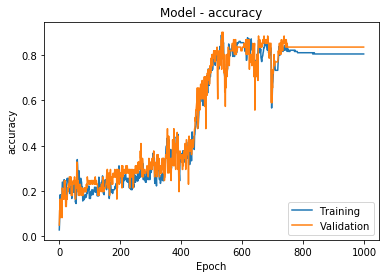

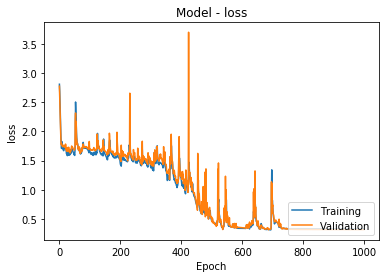

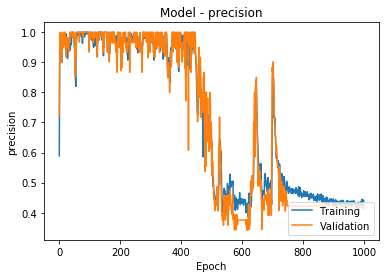

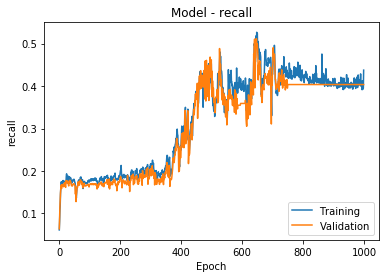

In [55]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss'], 
             ['precision', 'val_precision'], 
             ['recall', 'val_recall']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.show()
        
evaluate_model_(history)

In [71]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

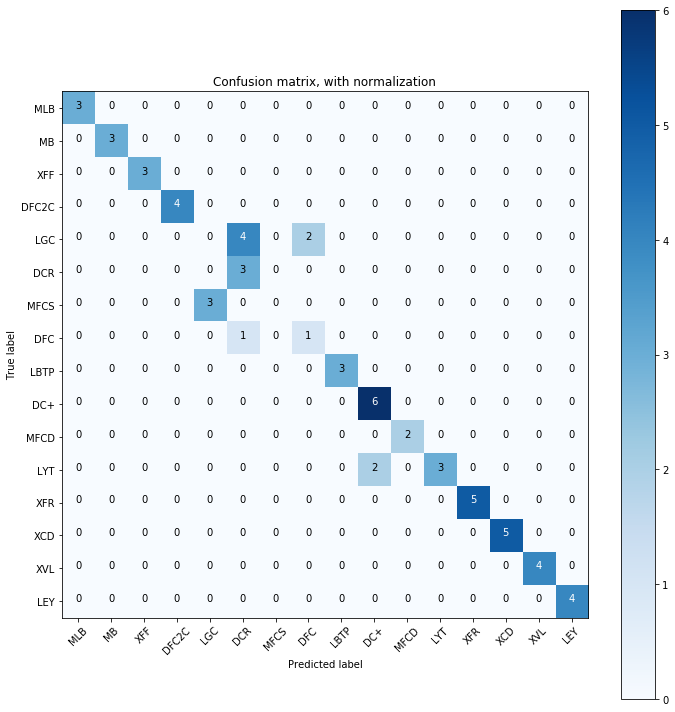

In [72]:
# predict test data
y_pred=model.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, 
                      classes=['MLB','MB','XFF','DFC2C','LGC', 'DCR', 'MFCS', 'DFC', 'LBTP', 'DC+', 'MFCD', 'LYT', 'XFR', 'XCD', 'XVL', 'LEY'],
                      normalize=False,
                      title='Confusion matrix, with normalization')


In [73]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['MLB','MB','XFF','DFC2C','LGC', 'DCR', 'MFCS', 'DFC', 'LBTP', 'DC+', 'MFCD', 'LYT', 'XFR', 'XCD', 'XVL', 'LEY']))

              precision    recall  f1-score   support

         MLB       1.00      1.00      1.00         3
          MB       1.00      1.00      1.00         3
         XFF       1.00      1.00      1.00         3
       DFC2C       1.00      1.00      1.00         4
         LGC       0.00      0.00      0.00         6
         DCR       0.38      1.00      0.55         3
        MFCS       0.00      0.00      0.00         3
         DFC       0.33      0.50      0.40         2
        LBTP       1.00      1.00      1.00         3
         DC+       0.75      1.00      0.86         6
        MFCD       1.00      1.00      1.00         2
         LYT       1.00      0.60      0.75         5
         XFR       1.00      1.00      1.00         5
         XCD       1.00      1.00      1.00         5
         XVL       1.00      1.00      1.00         4
         LEY       1.00      1.00      1.00         4

    accuracy                           0.80        61
   macro avg       0.78   

C:\Users\yunus\Anaconda3\envs\ROOT\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
